# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

While cleaning the data I observed that there is one duplicate with same mouse id,same timepoint,same tumor volume,same metatstatic sites,same Drug Regimen,Sex, Age_months and Weight
Before cleaning there were 249 mouse but after removing duplicates we have 248 mouses

Ketapril Regimen has highest Mean,median,Variance,Standard Deviation,SEM

In the Bar and pie chart, Maximum observed mouses under the drug Capomulin and minimum under the drug Propriva

According to pie chart Males and Females are almost equally distributed but Males are little more under the Drug Regimen as compared to Females 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df=pd.DataFrame(mouse_metadata)
study_df=pd.DataFrame(study_results)

# Combine the data into a single DataFrame
merge_df_1=pd.merge(study_df,mouse_df, on="Mouse ID")

# Display the data table for preview
merge_df_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Checking the number of mice.
merge_df_1["Mouse ID"].nunique()

249

In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint
merge_df_1["Mouse ID"].value_counts()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df_1.loc[merge_df_1.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [82]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice=merge_df_1.loc[merge_df_1["Mouse ID"]=="g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df=merge_df_1.loc[merge_df_1["Mouse ID"]!="g989"]

In [84]:
# Checking the number of mice in the clean DataFrame.
merge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean
median=merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median
variance=merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance
std_dev=merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_dev
sem=merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
single_summary_df=pd.DataFrame({"Mean Tumor Volume":mean,
                                "Median Tumor Volume":median,
                                "Tumor Volume Variance":variance,
                                "Tumor Volume Standard Deviation":std_dev,
                                "Tumor Volume Std.Err.":sem})
single_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Ketapril has the highest Mean,Median, Variance,Standard Deviation and Std.Err. Tumor Volume


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_df=merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

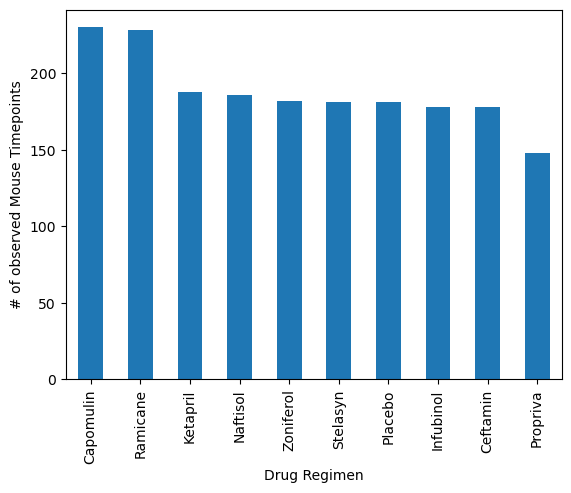

In [87]:
mice_count = merge_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.show()

Highest number of mouse observed under the CAPOMULIN Regimen and Lowest under the Propriva Regimen.

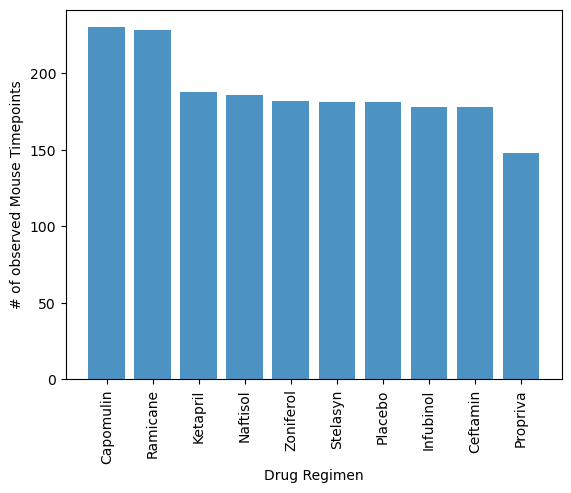

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


In [89]:
gender_df=merge_df[['Mouse ID','Sex']]
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mouse ID  1880 non-null   object
 1   Sex       1880 non-null   object
dtypes: object(2)
memory usage: 44.1+ KB


In [90]:
gender_df=gender_df.drop_duplicates()
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mouse ID  248 non-null    object
 1   Sex       248 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [91]:
id_gender= gender_df.groupby("Sex").size()

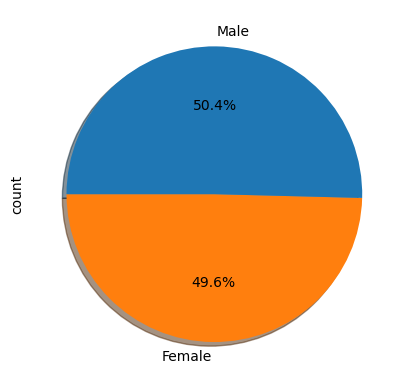

In [92]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_data = id_gender
labels=["Female","Male"]
colors=["tab:Orange","tab:blue"]
explode=(0,0)
# Get the unique mice with their gender
plt.pie(gender_data,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=180)
plt.ylabel("count")
plt.show()
# Make the pie chart


According to pie chart Males and Females are almost equally distributed but Males are little more under the Drug Regimen as compared to Females 

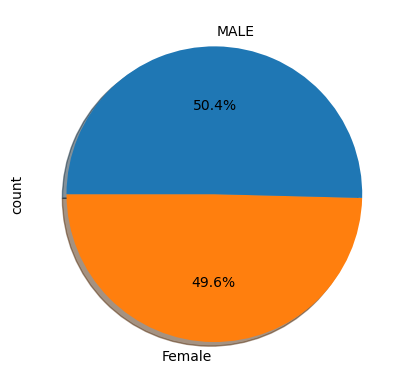

In [93]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_data = id_gender
labels=["Female","MALE"]
colors=["tab:Orange","tab:blue"]
explode=(0,0)
# Get the unique mice with their gender
plt.pie(gender_data,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=180)
plt.ylabel("count")
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimens
# Start by getting the last (greatest) timepoint for each mouse
time_points=treatment_regimens.groupby("Mouse ID")["Timepoint"].max()
time_points


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df2=pd.merge(time_points,merge_df,on=["Mouse ID","Timepoint"],how="left")
merge_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
#  Calculate the IQR and quantitatively determine if there are any potential outliers.



    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    tumor_vol=merge_df2.loc[merge_df2["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles=tumor_vol.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers=tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_35952\1247965168.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(tumor_vol_data, labels=treatment, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))


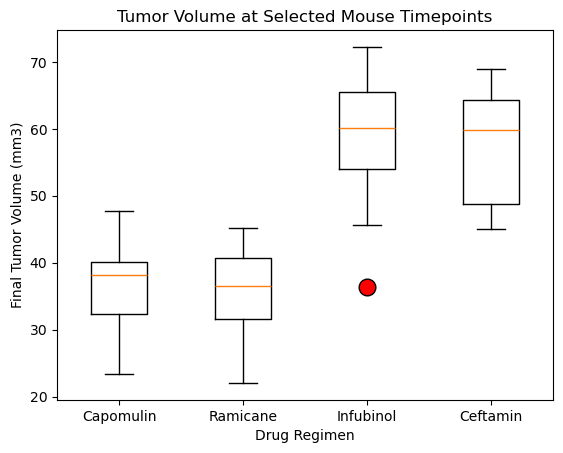

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse Timepoints')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatment, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.show()

## Line and Scatter Plots

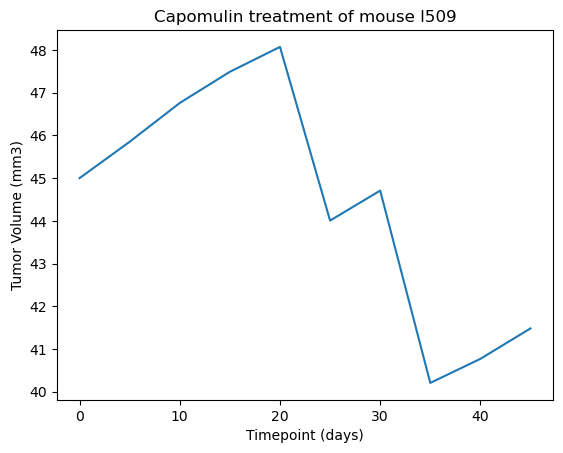

In [97]:
line_data = merge_df.loc[merge_df["Mouse ID"] == "l509",:]                                  
line_data
x_axis = line_data['Timepoint']
tumor_size = line_data['Tumor Volume (mm3)']
plt.plot(x_axis, tumor_size, linewidth = 1.5, markersize = 8)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

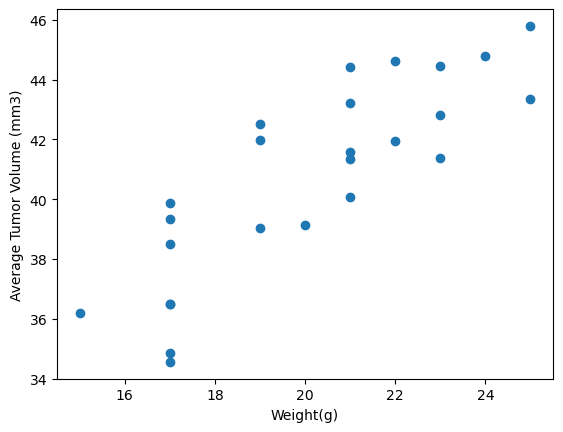

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_data = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',:]
capo_average_vol= capo_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capo_average_weight= capo_data.groupby('Mouse ID')["Weight (g)"].mean()
plt.scatter(capo_average_weight, capo_average_vol)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


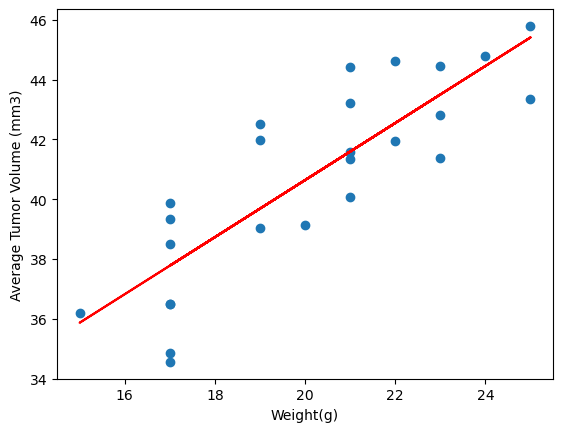

In [100]:
correlation=round(capo_average_weight.corr(capo_average_vol),2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_average_weight, capo_average_vol)
regress_values = capo_average_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_average_weight,capo_average_vol)
plt.plot(capo_average_weight,regress_values,"r-")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()